<a href="https://colab.research.google.com/github/DavyL0/Data-Analize-Bank/blob/main/Profissao_Cientista_de_Dados_M10_support_material_assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index = pd.read_csv('previsao_de_renda.csv')
index.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [14]:
quantitative_vars = index.select_dtypes(include=['float64', 'int64'])
quantitative_vars.head()

,Unnamed: 0,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,8682,1,36,3.575342,3.0,3369.24
1,1,12830,0,42,0.860274,2.0,6096.14
2,2,2885,2,31,8.065753,4.0,5658.98
3,3,16168,0,50,1.208219,2.0,7246.69
4,4,12438,0,52,13.873973,2.0,4017.37


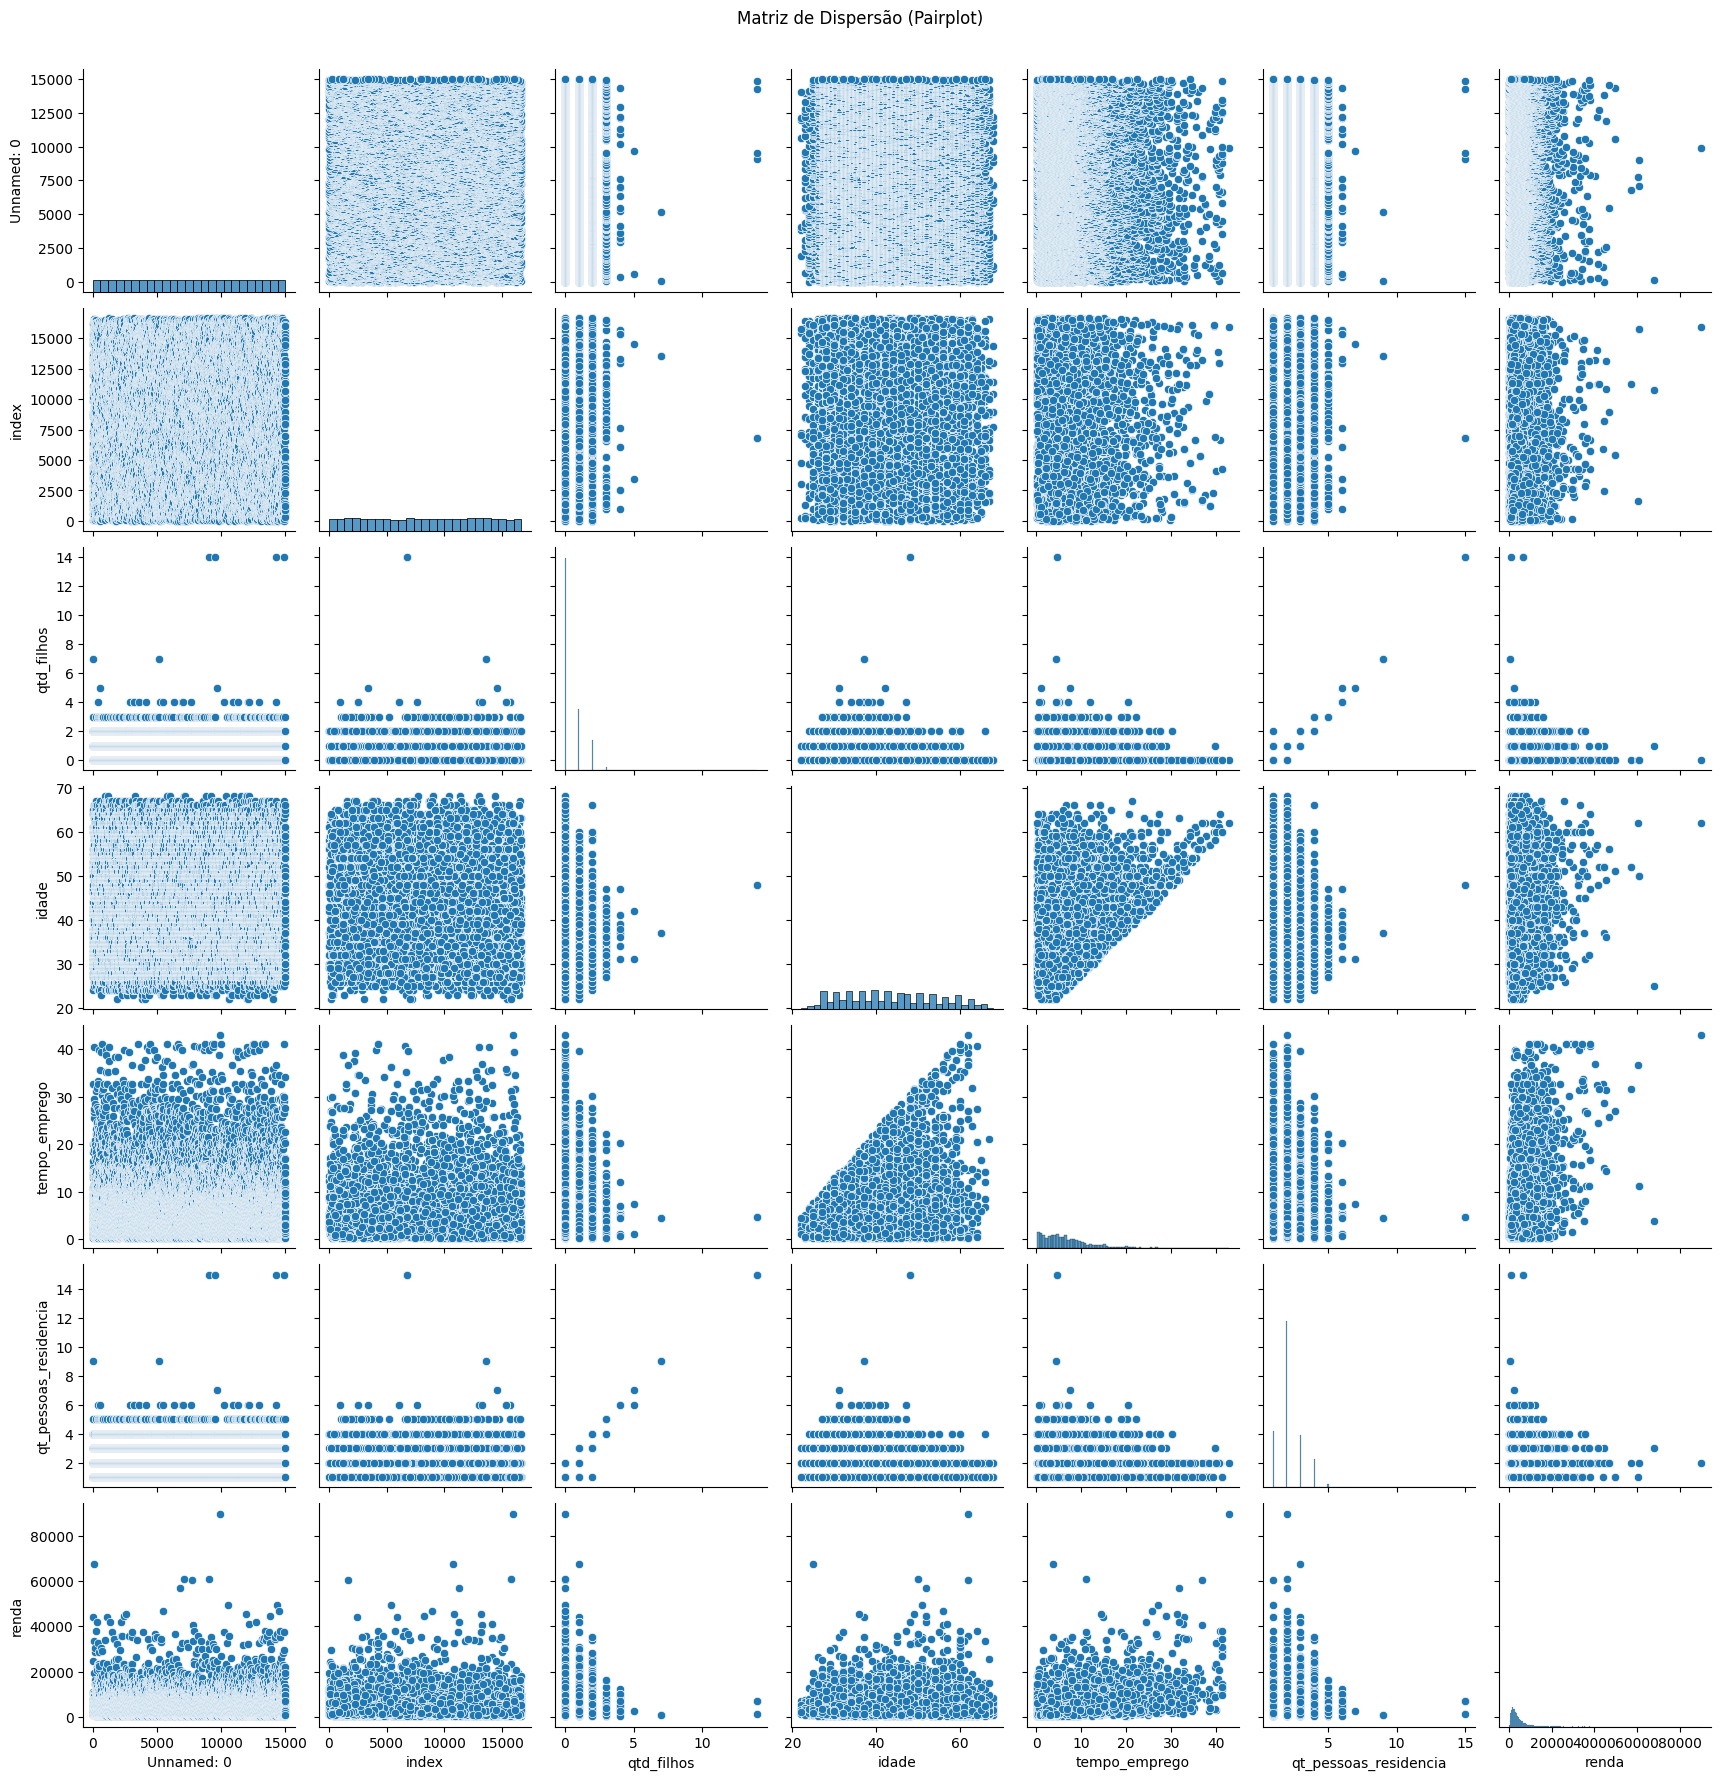

In [16]:
sns.pairplot(quantitative_vars)
plt.suptitle('Matriz de Dispersão (Pairplot)', y=1.02)
plt.show()

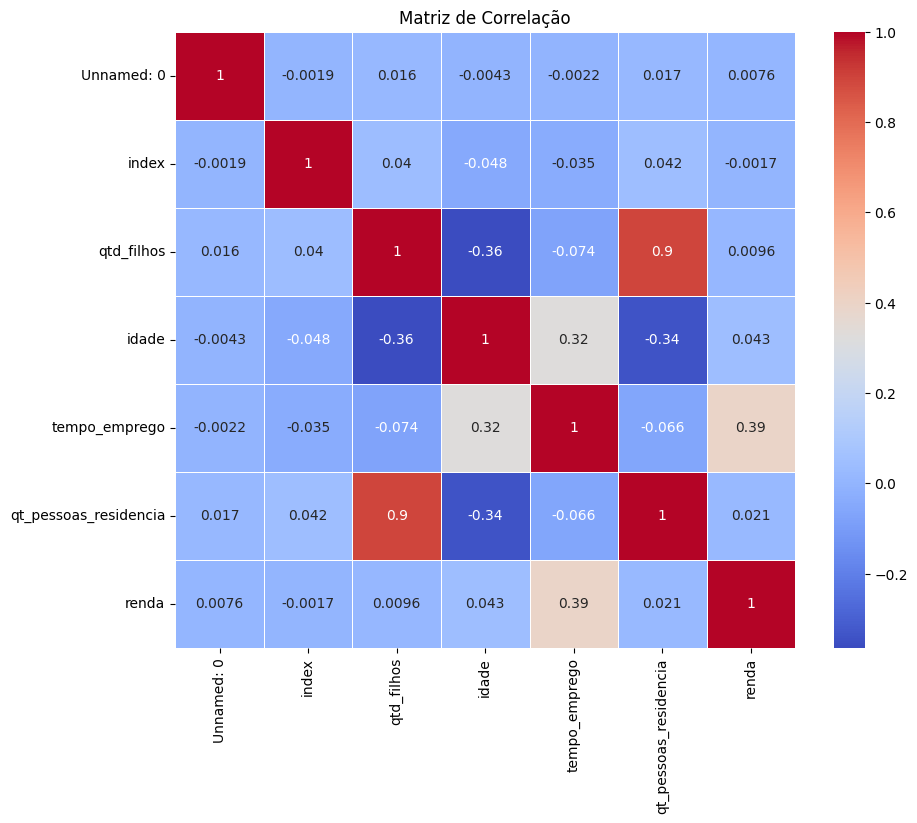

In [18]:
correlation_matrix = quantitative_vars.corr()

# Avaliação gráfica da matriz de correlações (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

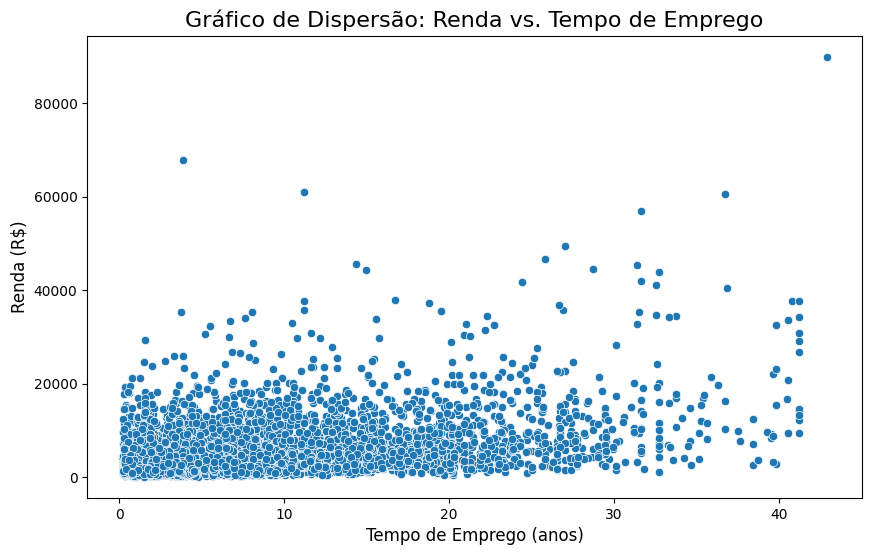

In [21]:
# Gráfico de dispersão entre Renda e Tempo de Emprego
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_emprego', y='renda', data=index)

# Ajustar o título e os rótulos
plt.title('Gráfico de Dispersão: Renda vs. Tempo de Emprego', fontsize=16)
plt.xlabel('Tempo de Emprego (anos)', fontsize=12)
plt.ylabel('Renda (R$)', fontsize=12)

# Mostrar o gráfico
plt.show()

3) Na su aopinião, há outliers na variável renda?

Sim existe outliers nesse caso porque existe apenas um contato com mais de 80000 de renda

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<ipython-input-23-a073a029ab0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[10] = np.nan
<ipython-input-23-a073a029ab0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[10] = np.nan


nan

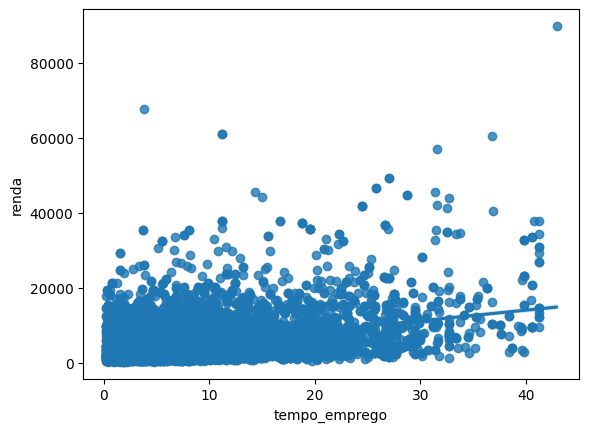

In [23]:
x[10] = np.nan
y[10] = np.nan
_ = sns.regplot(x=x, y=y)
np.corrcoef(x,y)[1,0]

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

realmente existe uma visivel melhora nesses dados, mas acredito se fizer outra relação ou uma melhor apuração pode melhor a analise. Além da aplicação dos logs